# Setup

In [13]:
import time
import math
import matplotlib.pyplot as plt
import numpy as np
import random as rnd
np.random.seed(123)
rnd.seed(123)
plt.rcParams["figure.figsize"] = (20,5)

# Sorting and Search: Theory
- These types of the problems are concerned with sorting and search on data structured in form of arrays. Typically 1d, 2d, 3d.
- Most of sorting and search problems of that type can be applying some modifications of base sorting & search algorithms, as well as working effectively with multiple pointers on arrays

## Base Algorithms
- Merge Sort
- Quick Sort
- Quick Select
- Binary Search
- Insertion Sort (used in TimSort)

## Methods working with Pointers
- Lomuto partitioning

## Properties
- Time & Space Complexity
- Stability

# Sample Problems & Solutions

## K Nearest Neigbours
### Problem Description
- Given a point A, and other n points in two-dimensional space, find K points out of n points which are nearest to A.
- Distance between two points is measured by the standard Euclidean method.
- 

### Input data

In [3]:
%%time
N = 10**7
points = [tuple(v) for v in np.random.rand(N,2)*2-1]
target = (0,0)

CPU times: user 6.17 s, sys: 311 ms, total: 6.48 s
Wall time: 6.51 s


### Solution 1: Brutefore
#### Description
Sorting & selecting first K elements

#### Complexity Analysis
- TC O(N * log N)
- Extra SC
    O(n) auxillary array for euclidian distances and indices of the original array 

#### Code

In [4]:
def nearestneighbors_bf(points, target, k):
    tx, ty = target
    nums = [(math.sqrt((x-tx)**2+(y-ty)**2), idx) for idx, (x, y) in enumerate(points)]
    result = sorted(nums, key=lambda x:x[0])
    return [points[idx] for _, idx in result[:k]]

### Solution 2: Quick Select version
#### Description
TODO - video

#### Complexity Analysis
- TC Om(n) = expected, O(n^2) worst case
- Extra SC 
       - O(n) auxillary array for euclidian distances and indices of the original array

#### Code

In [5]:
def nearestneighbors_qs(points, target, k):
    def quick_select(nums, k, l, r):
        if l>=r:
            return nums[:k]
        p = rnd.randint(l, r)
        nums[p], nums[l] = nums[l], nums[p]
        lo = l
        for hi in range(l+1, r+1):
            if nums[hi][0] < nums[l][0]:
                lo+=1
                nums[hi], nums[lo] = nums[lo], nums[hi]
        nums[l], nums[lo] = nums[lo], nums[l]
        if k == lo:
            return nums[:k]
        elif k < lo:
            return quick_select(nums, k, l, lo-1)
        else: # k > lo
            return quick_select(nums, k, lo+1, r)
    tx, ty = target
    nums = [(math.sqrt((x-tx)**2+(y-ty)**2), idx) for idx, (x, y) in enumerate(points)]
    result = quick_select(nums, k, 0, len(nums)-1)
    return [points[idx] for _, idx in result]


### Solution 3: Heap version
#### Description
TODO - video

#### Complexity Analysis:
- TC O(n * log k) worst case
- Extra SC 
       - O(k) space for heap
#### Code

In [6]:
import heapq

def nearestneighbors_heap(points, target, k):
    h = []
    tx, ty = target
    for idx in range(len(points)):
        x, y = points[idx]
        d = math.sqrt((x-tx)**2+(y-ty)**2)
        if len(h) < k:
            heapq.heappush(h, (-d, idx))
        else:
            if -h[0][0] > d:
                heapq.heappop(h)
                heapq.heappush(h, (-d, idx))
    return [points[idx] for _, idx in h]


### Visualization and Comparison

In [7]:
algorithms = [('Bruteforce', nearestneighbors_bf), ('QuickSelect', nearestneighbors_qs), ('Heap', nearestneighbors_heap)]

CPU times: user 57.8 ms, sys: 3.96 ms, total: 61.7 ms
Wall time: 58.9 ms


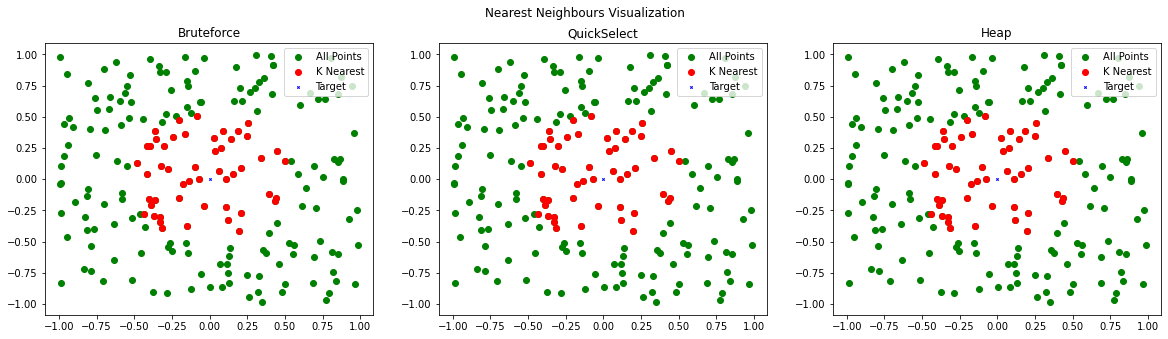

In [49]:
%%time
fig, axs = plt.subplots(1, 3)
fig.suptitle('Nearest Neighbours Visualization')
input_data = points[:200]
x,y = [x for x,_ in input_data], [y for _,y in input_data]
target = (0,0)
tx, ty = target
k = 50
for idx, (name, f) in enumerate(algorithms):
    result = f(input_data, target, k=50)
    xr,yr = [x for x,_ in result], [y for _,y in result]
    axs[idx].scatter(x,y, color='g', label='All Points')
    axs[idx].scatter(xr,yr, color='r', label='K Nearest')
    axs[idx].scatter(tx, ty, 10, c='b', marker='X', linewidth=0, label='Target')
    axs[idx].legend()
    axs[idx].set_title(name)
    

In [9]:
for name, f in algorithms:
    N = len(points)
    for k in [100, 10**4, 10**6]:
        tik = time.time()
        f(points, target, k=k)
        tak = time.time()
        print(f'Nearest Neighbours / {name}: execution time to find closest {k} points in array of {N} 2d points = {tak-tik:3.2f}sec')

Nearest Neighbours / Bruteforce: execution time to find closest 100 points in array of 10000000 2d points = 16.81sec
Nearest Neighbours / Bruteforce: execution time to find closest 10000 points in array of 10000000 2d points = 17.62sec
Nearest Neighbours / Bruteforce: execution time to find closest 1000000 points in array of 10000000 2d points = 18.16sec
Nearest Neighbours / QuickSelect: execution time to find closest 100 points in array of 10000000 2d points = 13.76sec
Nearest Neighbours / QuickSelect: execution time to find closest 10000 points in array of 10000000 2d points = 13.80sec
Nearest Neighbours / QuickSelect: execution time to find closest 1000000 points in array of 10000000 2d points = 18.09sec
Nearest Neighbours / Heap: execution time to find closest 100 points in array of 10000000 2d points = 11.29sec
Nearest Neighbours / Heap: execution time to find closest 10000 points in array of 10000000 2d points = 11.50sec
Nearest Neighbours / Heap: execution time to find closest 1

## Four Billion
### Description
Given 4 billion 32-bit integeres, return any one that's not among them. 
#### Constraints
- input array length: [1 .. 4 * 10^9]
- element of an input array [0 .. 2^32)
- part 1 - 1 GiB of memory
- part 2 - 10 MiB of memory

Note: GiB (Gibibytes) is a standard unit used in the field of data processing and transmission and is defined as base 1024 rather than base 1000.
```
For example, 1 GB is defined as 1000³ bytes, whereas 1 GiB is defined as 1024³ bytes.
Unit of measure 	Bytes
Kilobyte (KB) 	1000¹ = 1,000
Megabyte (MB) 	1000² = 1,000,000
Gigabyte (GB) 	1000³ = 1,000,000,000
Terabyte (TB) 	1000⁴ = 1,000,000,000,000
Petabyte (PB) 	1000⁵ = 1,000,000,000,000,000
  	 
Kibibyte (KiB) 	1024¹ = 1,024
Mebibyte (MiB) 	1024² = 1,048,576
Gibibyte (GiB) 	1024³ = 1,073,741,824
Tebibyte (TiB) 	1024⁴ = 1,099,511,627,776
Pebibyte (PiB) 	1024⁵ = 1,125,899,906,842,624
```

### Examples
#### Example 1
Input: [0,1,3]
Output: 2 (any number in [2, 4 .. 2^32) will work)
#### Example 2
Input: [9999, 555, 0]
Output: 1 (any missing number in [0..1024^3) will work)

### Input Data

In [45]:
N = 10000 # Assume it is 4 billion
missing_idx = rnd.randint(0,N-1)
data = list(range(0, missing_idx))+list(range(missing_idx+1,N))
print(f'Missing idx = {missing_idx}')

Missing idx = 4385


### Solution: part 1
Description
- Unsigned 32 bit integer can take any value in range 0 to 4,294,967,295. Total 4,294,967,296 potential values
    - ``` The XDR standard defines signed integers as integer. A signed integer is a 32-bit datum that encodes an integer in the range [-2147483648 to 2147483647]. An unsigned integer is a 32-bit datum that encodes a nonnegative integer in the range [0 to 4294967295].```    
- 1GiB = 1024^3 bytes, or 8,589,934,592 bits (each byte is 8 bits)
- Our memory has more bits than our input array. We can use our 1GiB as an index, where first 2^32 bits will represent a number
- We will initialize index with 0, and will have two passes over our index: 
    - in the first pass we will turn on bits to 1 for encountered numbers
    - in the second pass we will iterate through the index and will return first position with bit equal to 0


#### Complexity Analysis    
- TC O(N), where N is the size of an input array
- SC <= 1GiB

#### Code

In [48]:
def find_integer_1gib(arr):
    mem_index = bytearray(math.ceil(N/8.))
    
    for num in arr:
        base_idx = num // 8 
        shift_idx = 1 << (num % 8)
        mem_index[base_idx] |= shift_idx
        
    for base_idx in range(len(mem_index)):
        for shift_idx in range(8):
            if mem_index[base_idx] & 1 << shift_idx == 0:
                return base_idx * 8 + shift_idx
    return 0

In [55]:
result_idx = find_integer_1gib(data)
print(f'Missing number = {result_idx}')
assert result_idx == missing_idx

Missing number = 4385


### Solution: part 2
#### Description
- Unsigned 32 bit integer can take any value in range 0 to 4,294,967,295. Total 4,294,967,296 potential values
- 10 MiB = 10 * 1024^2 bytes, or 83,886,080 bits
- Our memory is not sufficient to store indices of all elements. 
- We can think of 32 bit integer as 2^16 * 2^16. 
    - In the first pass (of length N) we will allocate 2^16 buckets and will count integers with higher 16 bits in each bucket.
    - The second pass will be over 2^16 buckets to find bucket with the missing value
    - The third pass (second of length N) will be over all elements 
    
#### Complexity Analysis
- TC O(N)
- SC <= 10MiB (Technically it is ~ 2^16 * 16 Bit )

#### Code

In [52]:
def find_integer_10mib(arr):
    buckets_number = 2 ** 16
    expected_elements_in_bucket = 2 ** 16
    freq = [0] * buckets_number

    for num in arr:
        higher_idx = num >> 16
        freq[higher_idx] += 1

    for bicket_idx in range(buckets_number):
        if freq[bicket_idx] < expected_elements_in_bucket:
            bucket = bytearray(expected_elements_in_bucket)
            for num in arr:
                current_num_bucket_idx = num >> 16
                if current_num_bucket_idx == bicket_idx:
                    bucket_element_idx = num % buckets_number
                    bucket[bucket_element_idx] = 1

            for bucket_element_idx in range(expected_elements_in_bucket):
                if bucket[bucket_element_idx] == 0:
                    return (bicket_idx << 16) + bucket_element_idx
    return 0

In [54]:
result_idx = find_integer_10mib(data)
print(f'Missing number = {result_idx}')
assert result_idx == missing_idx

Missing number = 4385


# References
- Hoare partitioning TBD
- Lomuto partitioning TBD- 
- Integers - https://www.ibm.com/docs/en/aix/7.1?topic=types-signed-unsigned-integers